In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def display_img(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=plt.subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
reeses=cv2.imread("../DATA/reeses_puffs.png",0)

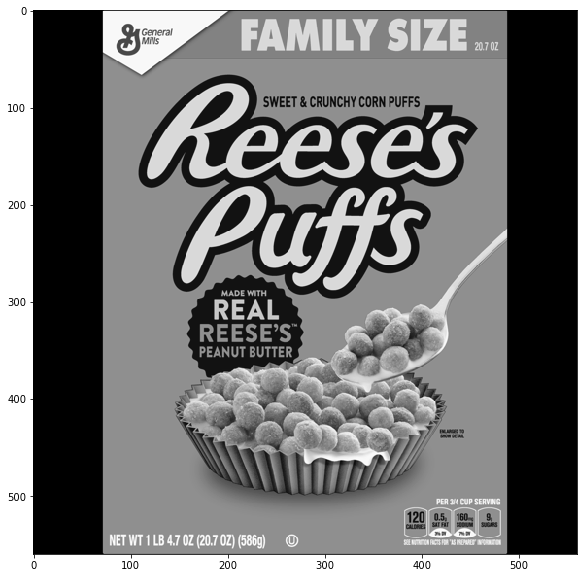

In [5]:
display_img(reeses)

In [6]:
cereals=cv2.imread("../DATA/many_cereals.jpg",0)

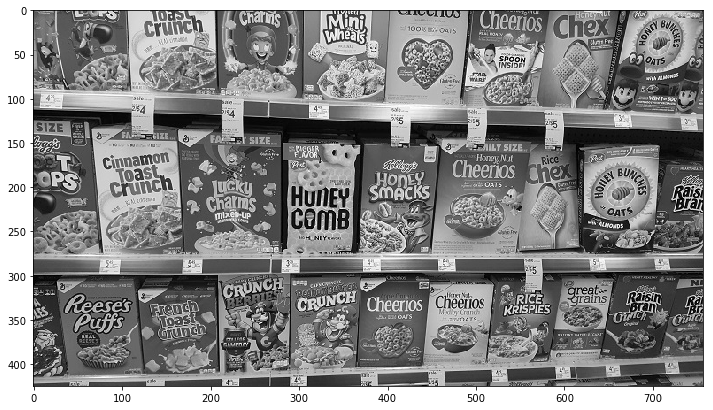

In [7]:
display_img(cereals)

In [8]:
# 1] Initating ORB detector

In [9]:
orb=cv2.ORB_create()

In [10]:
orb

<ORB 000002090046B7B0>

In [11]:
# 2] Find the keypoints and descriptors with ORB

In [12]:
kp1,des1=orb.detectAndCompute(reeses,None)

In [13]:
kp2,des2=orb.detectAndCompute(cereals,None)

In [14]:
kp1[:5] #displaying first 5 keypoint

[<KeyPoint 000002097FCF1C90>,
 <KeyPoint 000002097FCF1CC0>,
 <KeyPoint 000002097FCF19C0>,
 <KeyPoint 000002097FCF1840>,
 <KeyPoint 000002097FCF1240>]

In [15]:
des1[:5]

array([[163,  42, 226,  17, 117, 187, 234,  66, 125,   7,  82, 151, 168,
        136, 183, 140, 235,  41, 130, 149, 164, 188,   4, 238,   6,  30,
        154,  65, 205, 141, 123, 132],
       [ 92,  65, 134, 173,  13,  34,  78,  40, 165, 130, 194,   2,  91,
        107,  49,  75, 120, 229, 125, 227,  72, 193,  17, 136, 243, 227,
        207,  17,  38, 251,  48,   0],
       [ 17, 205,  73, 237,  20, 202, 111,  55,  20,  33, 202,   2, 179,
         35,  48,  96,  88, 174,  27, 168,  41, 184, 113,  31, 229, 175,
        178,   0,  52, 136, 240,  40],
       [ 34, 172,  42, 153,  87, 209, 176,  71, 150,  69,  72, 147,  32,
        140,  54,   0, 232, 171, 131, 133,  22, 186,  52, 223,  23,   6,
        154,   3,  85,  12, 246, 222],
       [125,  70, 160,  42, 221,  60,  87, 136,  83, 255, 172,  29,  74,
        232, 127,  94, 209, 206, 108,  62,  62,  99, 187, 178, 187, 253,
          5,  63, 210, 127, 212,  70]], dtype=uint8)

In [19]:
# 3] Create Brute Force Matcher Object 

In [20]:
matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [21]:
# 4] Match descriptors 

In [22]:
matches=matcher.match(des1,des2)

In [23]:
single_match=matches[0]

In [26]:
print(matches[:1])
print(single_match.distance)

[<DMatch 00000209000DD690>]
78.0


In [27]:
# lesser distance better match, greater distance poorer match

In [28]:
# 5] Sort them in the order of their distance 

In [29]:
matches=sorted(matches,key= lambda x:x.distance)

In [30]:
matches[0].distance

44.0

In [31]:
# 6] Drawing first 15 matches

In [37]:
result=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:15],None,flags=2)

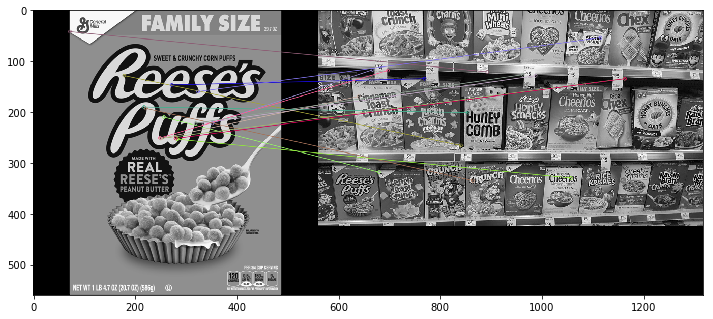

In [38]:
display_img(result)